In [38]:
from torch.utils.data import Dataset
import cv2
import numpy as np
from glob import glob
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import cv2

In [33]:
class BrainDataset(Dataset):
    def __init__(
            self,
            root_dir = '/data/users/6370327221/dataset/MRI-Brain-tumor-cls',
            is_train = True,
            transform = None
            ):
        if is_train:
            self.im_paths = sorted(glob(root_dir + '/Training/**' + '/*.jpg'))
        elif not is_train:
            self.im_paths = sorted(glob(root_dir + '/Testing/**' + '/*.jpg'))
        self.transform = transform

    def __len__(self):
        return len(self.im_paths)

    def __getitem__(self, index):
        im_path = self.im_paths[index]
        image = cv2.imread(im_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.float32(image)

        label = im_path.split('/')[-2].split('_')[0]
        label = torch.tensor(int(label)).long()

        if self.transform is not None:
            augmentations = self.transform(image=image)
            image = augmentations["image"]
            image = image.float()

        return image, label, im_path

In [26]:
transform = A.Compose(
            [
                A.Resize(height=256, width=256),
                A.Rotate(limit=180, p=1.0),
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.5),
                ToTensorV2(),
            ]
        )

In [36]:
dataset = BrainDataset(is_train=True, transform=transform)

In [37]:
dataset[1099][2]

'/data/users/6370327221/dataset/MRI-Brain-tumor-cls/Training/1_glioma_tumor/gg (733).jpg'

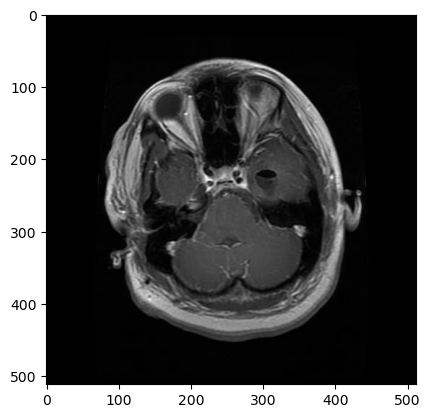

In [39]:
plt.imshow(cv2.imread(dataset[1099][2]))

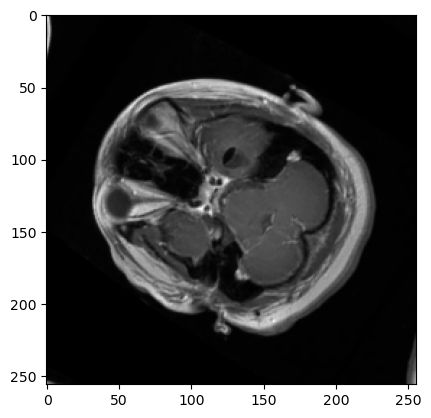

In [34]:
plt.imshow(dataset[1099][0].permute(1,2,0), cmap='gray')